# Visualising correlations between factors affecteing total waiting time and patient satisfaction 

In [1]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('clean_ER.csv')
df.describe()
print(df.dtypes)

visit_id                        object
patient_id                      object
hospital_id                     object
hospital_name                   object
region                          object
visit_date                      object
day_of_week                     object
season                          object
time_of_day                     object
urgency_level                   object
nurse_to_patient_ratio           int64
specialist_availability          int64
facility_size                    int64
time_of_registration             int64
time_to_triage                   int64
time_of_medical_professional     int64
total_wait_time                  int64
patient_outcome                 object
patient_satisfaction             int64
time                            object
month                           object
date                            object
data_flag                       object
dtype: object


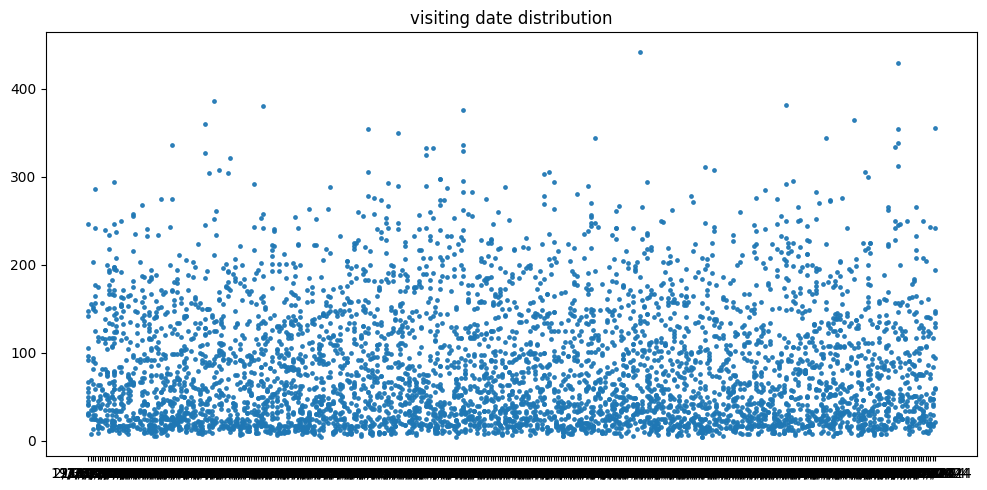

In [3]:
## wait time distrivution

# line chart on visit date
plt.figure(figsize=(10, 5))
plt.scatter(df['date'], df['total_wait_time'], alpha = 0.9, s = 6)
plt.title('visiting date distribution')
plt.tight_layout()
plt.show()

In [4]:
# waiting time relations genrally

factors = pd.get_dummies(df.drop(columns=['date','visit_date','time','hospital_name','patient_id','visit_id','data_flag']),drop_first =True)
sns.pairplot(factors)

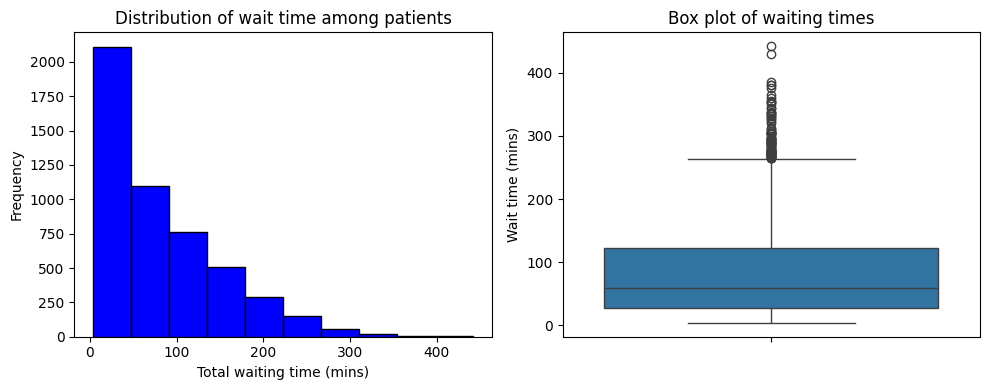

In [5]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(df['total_wait_time'], bins= 10, color='blue', edgecolor='black')
plt.title('Distribution of wait time among patients')
plt.xticks()
plt.xlabel('Total waiting time (mins)')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.boxplot(df['total_wait_time'])
plt.title('Box plot of waiting times')
plt.ylabel('Wait time (mins)')

plt.tight_layout()
plt.show()

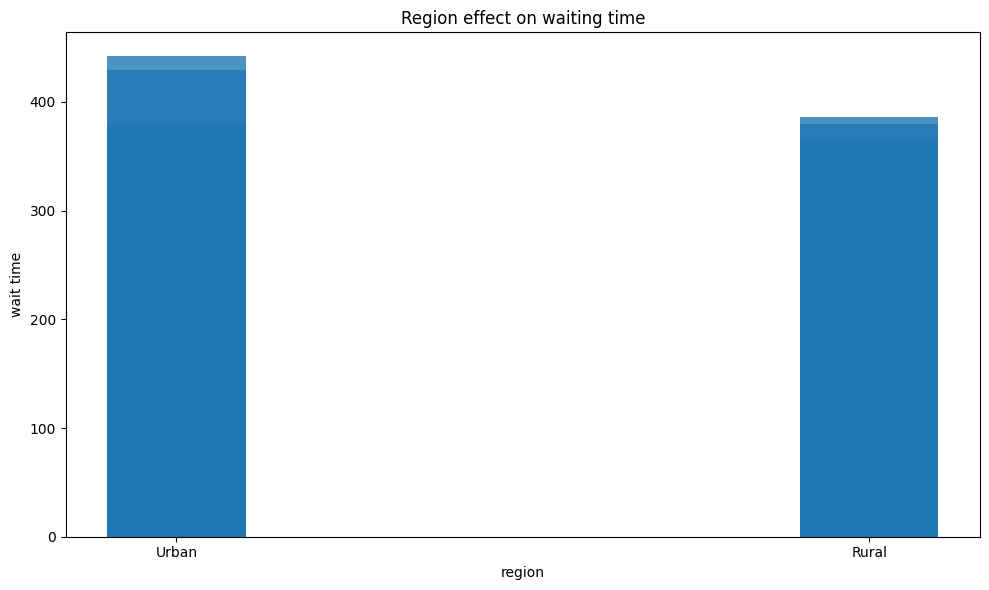

In [6]:
width = 0.20
plt.figure(figsize=(10,6))
plt.bar(df['region'], df['total_wait_time'], width, label = 'total waiting time', alpha = 0.8)


plt.xlabel('region')
plt.ylabel('wait time')
plt.title('Region effect on waiting time')
plt.tight_layout()
plt.show()

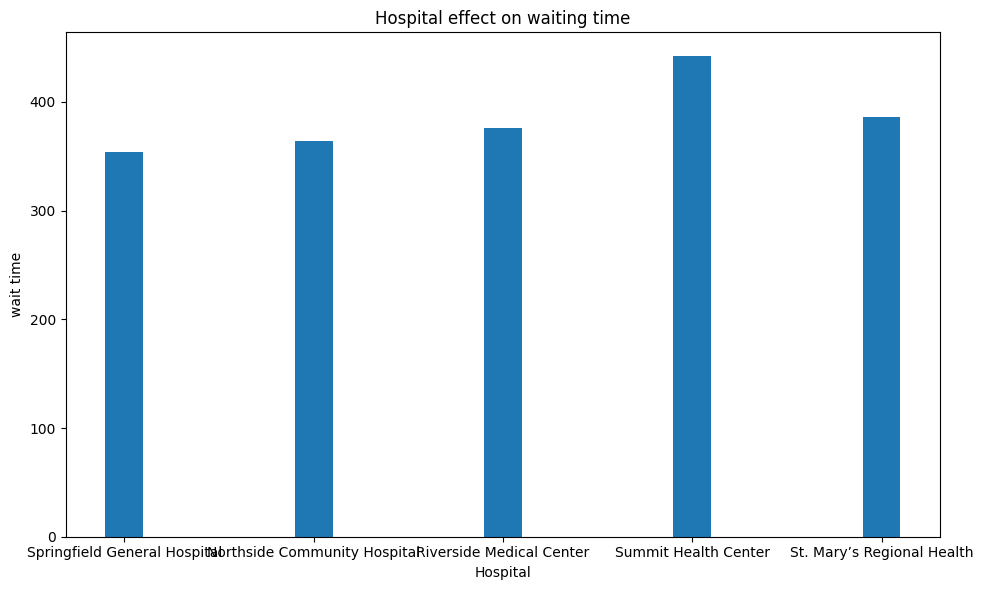

In [9]:
width = 0.20
plt.figure(figsize=(10,6))
plt.bar(df['hospital_name'], df['total_wait_time'], width, label = 'total waiting time')


plt.xlabel('Hospital')
plt.ylabel('wait time')
plt.title('Hospital effect on waiting time')
plt.tight_layout()
plt.show()

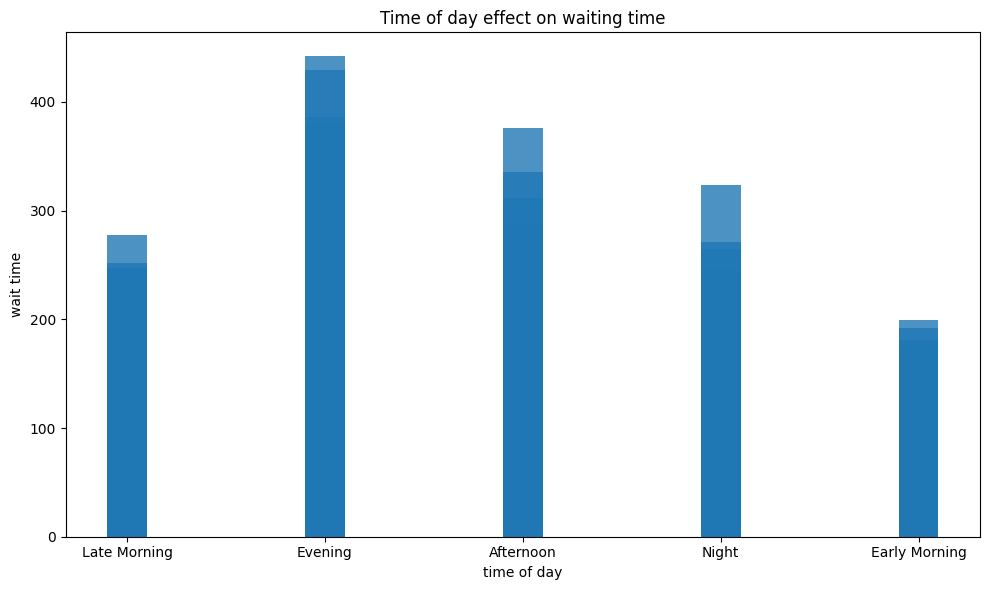

In [8]:
width = 0.20
plt.figure(figsize=(10,6))
plt.bar(df['time_of_day'], df['total_wait_time'], width, label = 'total waiting time', alpha = 0.8)


plt.xlabel('time of day')
plt.ylabel('wait time')
plt.title('Time of day effect on waiting time')
plt.tight_layout()
plt.show()

C:\Users\SSD TECH\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


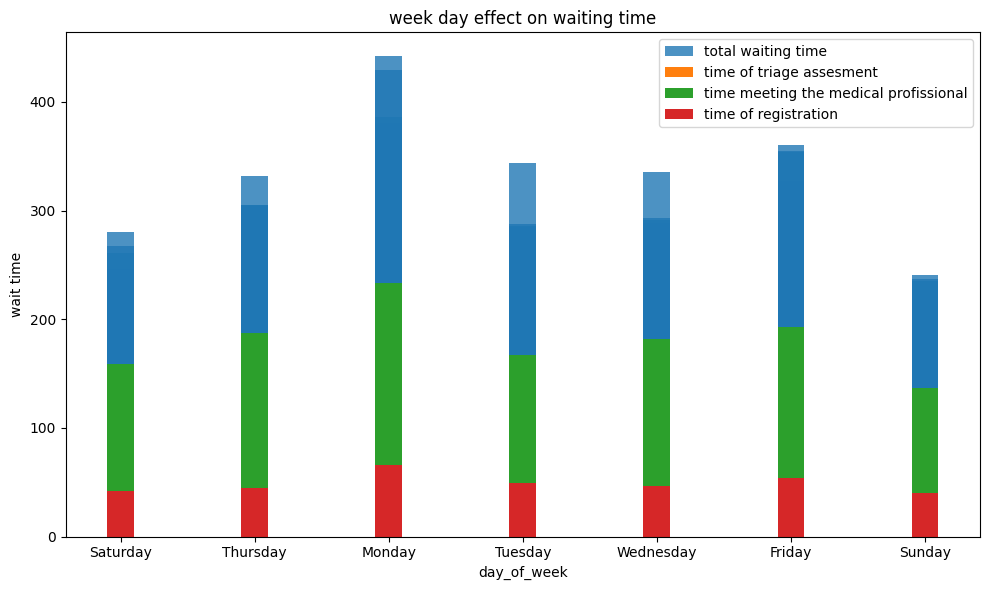

In [5]:
# bar chart

width = 0.20
plt.figure(figsize=(10,6))
plt.bar(df['day_of_week'], df['total_wait_time'], width, label = 'total waiting time', alpha = 0.8)
plt.bar(df['day_of_week'], df['time_to_triage'], width, label = 'time of triage assesment')
plt.bar(df['day_of_week'], df['time_of_medical_professional'], width, label = 'time meeting the medical profissional')
plt.bar(df['day_of_week'], df['time_of_registration'], width, label = 'time of registration')

plt.xlabel('day_of_week')
plt.ylabel('wait time')
plt.title('week day effect on waiting time')
plt.legend()
plt.tight_layout()
plt.show()

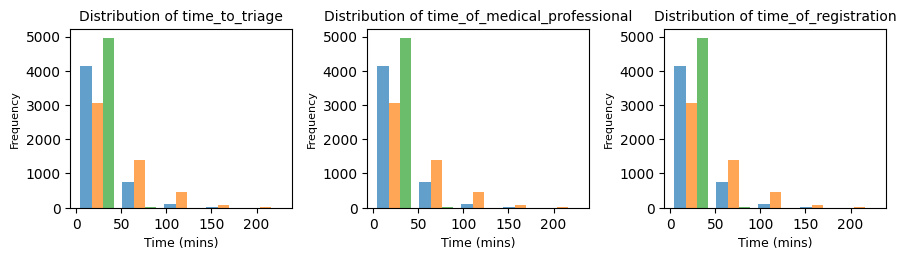

In [6]:
times = ['time_to_triage','time_of_medical_professional','time_of_registration']
plt.figure(figsize=(15,7))
for i,col in enumerate(times, 1):
    plt.subplot(3,5,i)
    plt.hist(df[times], bins=5, alpha=0.7)
    plt.title(f'Distribution of {col}', fontsize=10)
    plt.xlabel('Time (mins)', fontsize=9)
    plt.ylabel('Frequency',fontsize=8)
plt.tight_layout()
plt.show()

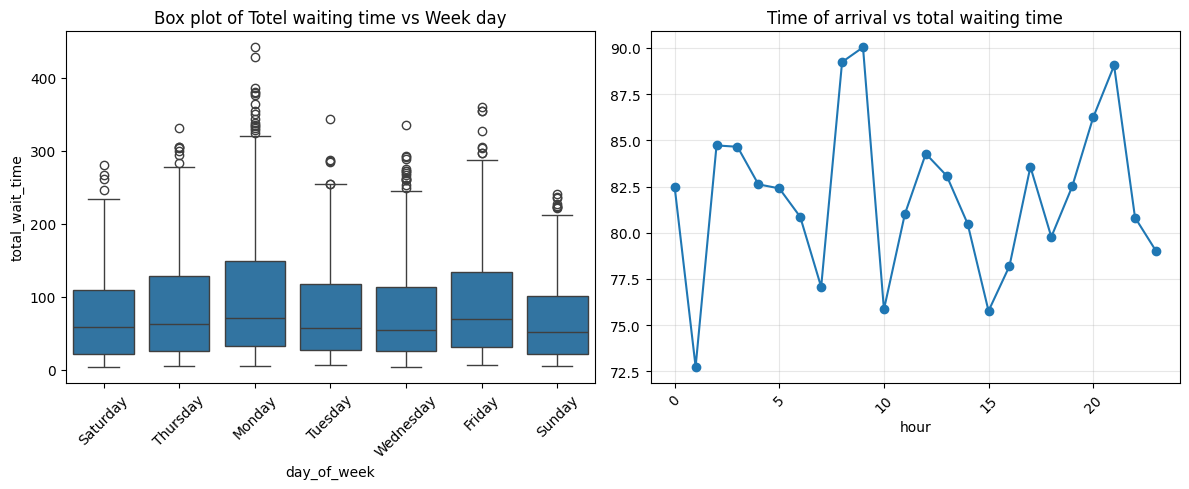

In [6]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(data=df, x='day_of_week',y ='total_wait_time')
plt.title('Box plot of Totel waiting time vs Week day')
plt.xticks(rotation=45)

df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour
arrival_hour_avg_time = df.groupby('hour')['total_wait_time'].mean()
plt.subplot(1,2,2)
arrival_hour_avg_time.plot(kind='line', marker='o')
plt.title('Time of arrival vs total waiting time')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Here we see something intersting
We can clearly see the greate drop in waiting time after chrismas

C:\Users\SSD TECH\AppData\Local\Temp\ipykernel_2336\4121740118.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg_time = df.groupby('month')['total_wait_time'].mean()


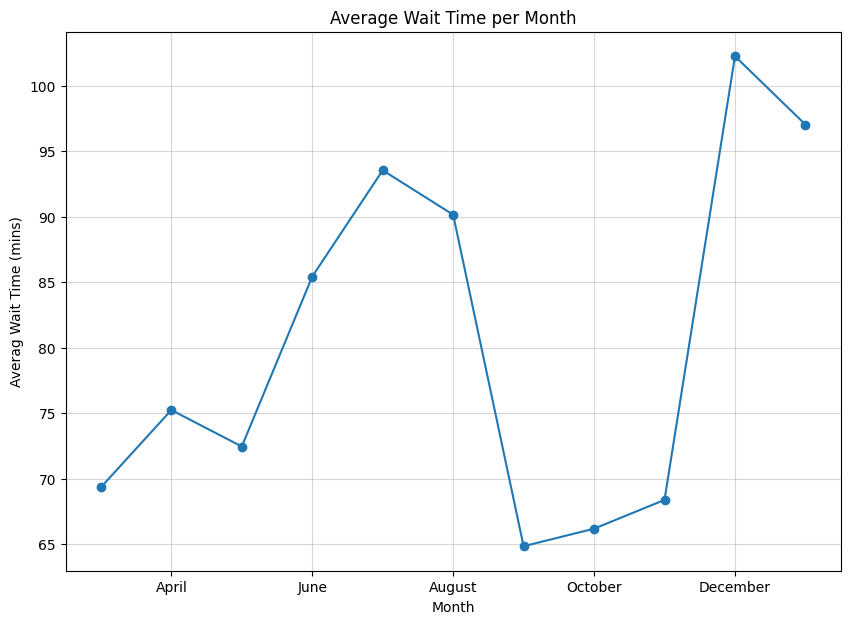

In [15]:
order = ['Febreuary','March','April','May','June','July','August','September','October','November','December','January']

df['month'] = pd.Categorical(df['month'], categories=order, ordered= True)
monthly_avg_time = df.groupby('month')['total_wait_time'].mean()

plt.figure(figsize=(10,7))
monthly_avg_time.plot(kind='line', marker='o')
plt.title('Average Wait Time per Month')
plt.xlabel('Month')
plt.ylabel('Averag Wait Time (mins)')
plt.grid(True, alpha=0.5)
plt.show()

In [ ]:
new_ticks = np.arange(0,450,50)

plt.hist(df['month'], bins = 20, edgecolor= 'black', width = 0.35)
plt.title('distribution of visits per month')
plt.xlabel('month')
plt.ylabel('frequency')
plt.xticks(rotation = 45, ha ='right')
plt.yticks(new_ticks)
plt.tight_layout()
plt.show()

# Triage level effect 

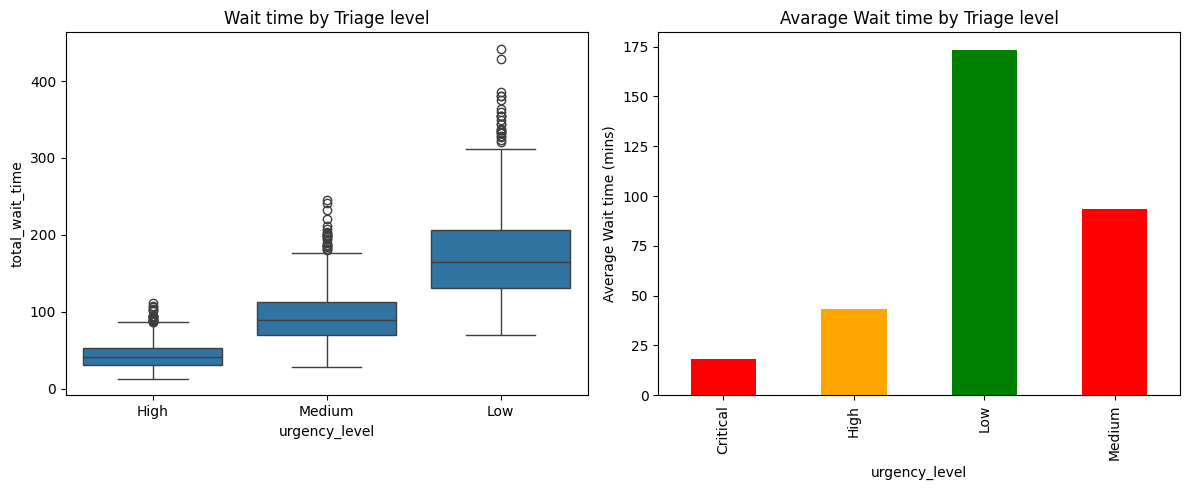

In [37]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=df['urgency_level'], y= df['total_wait_time'], order=['High','Medium','Low'])
plt.title('Wait time by Triage level')

plt.subplot(1,2,2)
triage_avg_time = df.groupby('urgency_level')['total_wait_time'].mean()
triage_avg_time.plot(kind='bar', color=['red','orange','green'])
plt.title('Avarage Wait time by Triage level')
plt.ylabel('Average Wait time (mins)')

plt.tight_layout()
plt.show()


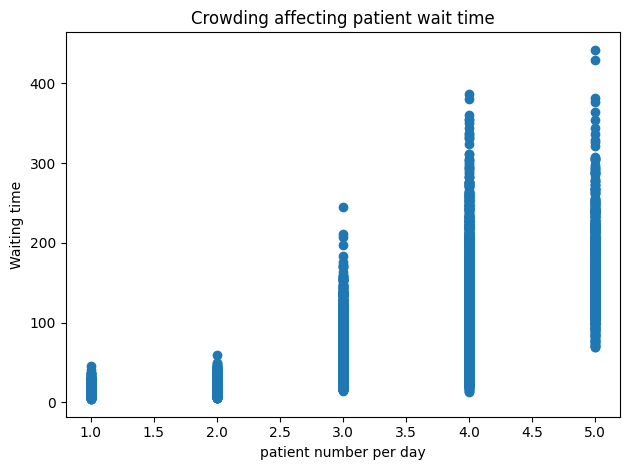

In [16]:
plt.scatter(df['nurse_to_patient_ratio'], df['total_wait_time'])
plt.xlabel('patient number per day')
plt.ylabel('Waiting time')
plt.title('Crowding affecting patient wait time')

plt.tight_layout()
plt.show()

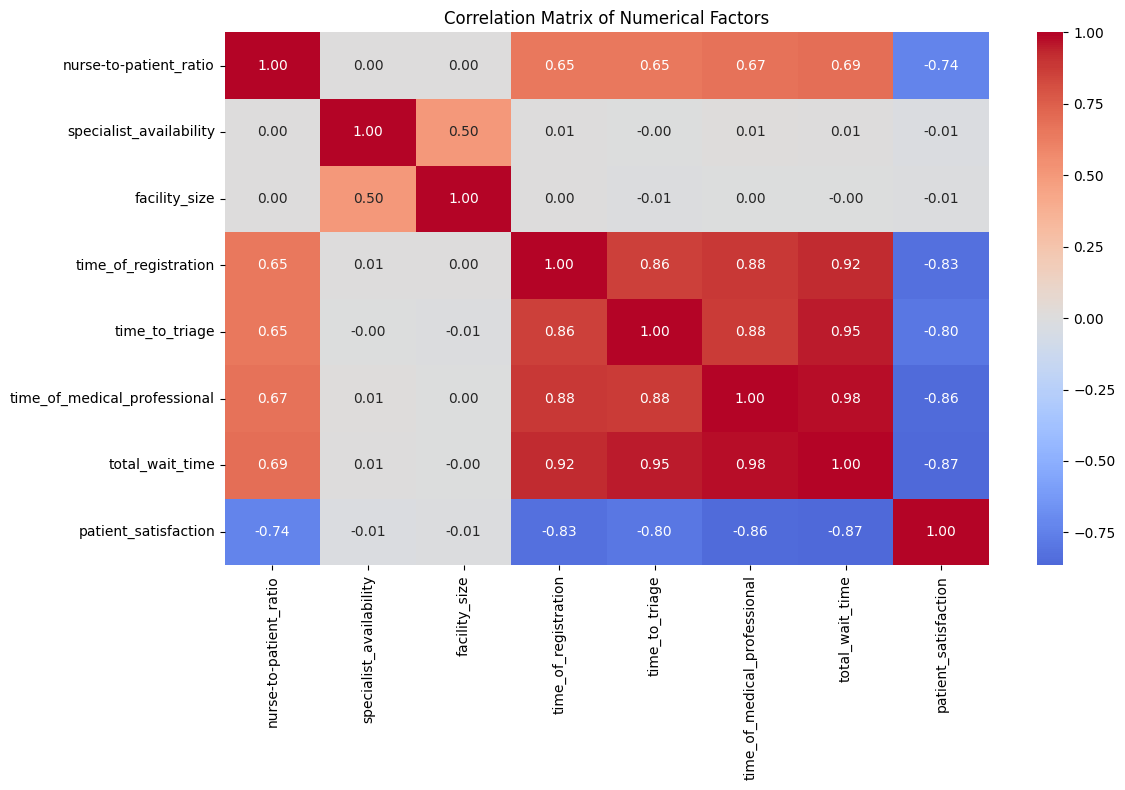

In [26]:
numericals = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numericals].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numerical Factors')
plt. tight_layout()
plt.show()